#Разведочный анализ данных

Для начала подключим библиотеки, которые нам понадобятся и загрузим данные.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.core.pylabtools import figsize
figsize(25, 25)
data = pd.read_csv('zoo.csv'  , sep=',')
# Посмотрим на несколько записей из набора данных
data.head(100)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,vulture,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,1,2
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


pandas - библиотека для работы с данными:объектами, признаками, ответами; numpy - библиотека для работы с матрицами и многомерными массивами; matplotlib.pyplot - -визуализация данных; для matplotlib, чтобы отображались графики команда %matplotlib inline

Библиотека seaborn служит для того, чтобы нарисовать картинку

Ниже загружаем данные с помощью pd.read_csv

sep=',' - аргумент, который задает символ, разделяющий значения в файлах

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


Этот набор данных - список животных и их признаков (наличие шерсти, когтей, хвотса и т.д.). Будем предсказывать значение переменной hair, которая означает, есть ли у животного шерсть. Эта задача - задача бинарной классификации. 

Вывод общей информации по колонкам: после column столбец обозначает сколько объектов (заполненных ячеек), non-null - ни один объект не пропущен

В нашей выборке есть признаки "class_type" (порядковый номер класса)и "catsize" (размер животных больше кошки). Очевидно, они нам не понадобятся. Выбросим их из выборки:

In [ ]:
data = data.drop(['class_type', 'catsize'], axis='columns') # первый аргумент - список ненужных признаков,
                                                   # второй - поиск имен признаков по названиям колонок, а не строк

Посмотрим таблицу и убедимся, что ненужные нам колонки убрались 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
dtypes: int64(15), object(1)
memory usage: 12.8+ KB


Посмотрим, можем ли мы выбросить еще какие-нибудь признаки из нашей таблицы. Это стоит делать, поскольку чем меньше признаков - тем легче вычислять расстояние между объектами, то есть алгоритм будет работать быстрее. Посмотрим на корреляцию признаков между собой. Построим графическое представление модуля значения корреляции попарно между признаками.

Если два признака коррелируют, то один из них нам не нужен. Самая явная корреляция показана 1, наименьшая нулем. Здесь не учитывается, что коэффициент корреляции может быть равен -1 (когда величины обратнопропорциональны), чтобы не засорять картинку. Смотрим, есть ли высокий модуль корреляции между признаками.

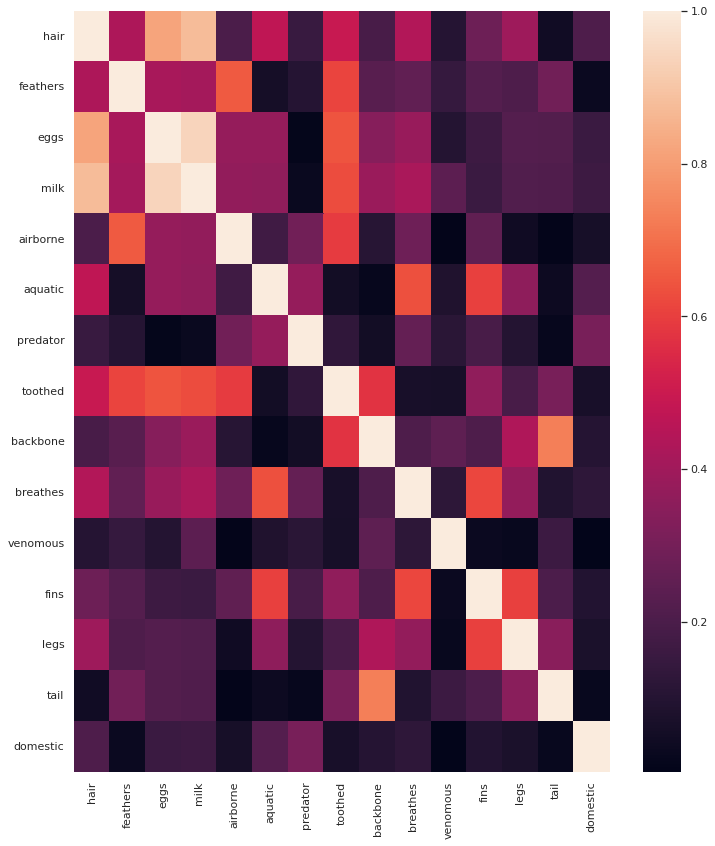

In [ ]:
# Картинку отрисуем с помощью библиотеки seaborn
import seaborn as sns
# Подсчитаем корреляцию и возьмем модуль от нее
corr = data.corr().abs()
# Следующая команда устанавливает размер картинки (по умолчанию она довольно маленькая)
sns.set(rc={'figure.figsize':(12, 14)})
# Нарисуем картинку
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Удалим из выборки признаки, высоко коррелирующие с другими признаками - зачем они нам?)

In [ ]:
data = data.drop(['airborne', 'aquatic', 'fins', 'eggs'], axis='columns')

Посмотрим какие признаки остались

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   milk         101 non-null    int64 
 4   predator     101 non-null    int64 
 5   toothed      101 non-null    int64 
 6   backbone     101 non-null    int64 
 7   breathes     101 non-null    int64 
 8   venomous     101 non-null    int64 
 9   legs         101 non-null    int64 
 10  tail         101 non-null    int64 
 11  domestic     101 non-null    int64 
dtypes: int64(11), object(1)
memory usage: 9.6+ KB


Посмотрим их корреляцию

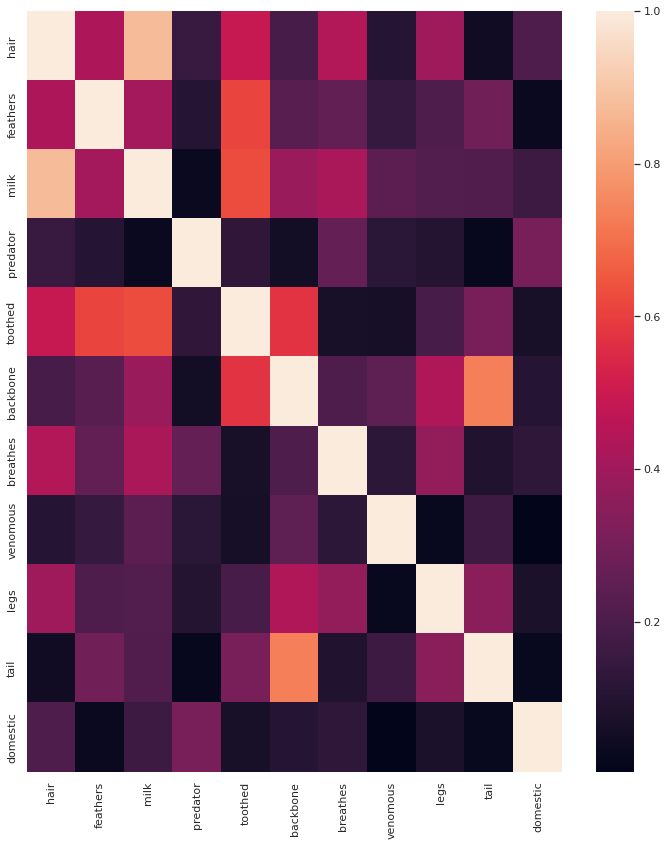

In [ ]:
# Картинку отрисуем с помощью библиотеки seaborn
import seaborn as sns
# Подсчитаем корреляцию и возьмем модуль от нее
corr = data.corr().abs()
# Следующая команда устанавливает размер картинки (по умолчанию она довольно маленькая)
sns.set(rc={'figure.figsize':(12, 14)})
# Нарисуем картинку
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Признаки, оставшиеся после прореживания

head() используется для возврата первых n (по умолчанию 5) строк фрейма данных или серии

In [ ]:
data.head()

,animal_name,hair,feathers,milk,predator,toothed,backbone,breathes,venomous,legs,tail,domestic
0,aardvark,1,0,1,1,1,1,1,0,4,0,0
1,antelope,1,0,1,0,1,1,1,0,4,1,0
2,bass,0,0,0,1,1,1,0,0,0,1,0
3,bear,1,0,1,1,1,1,1,0,4,0,0
4,boar,1,0,1,1,1,1,1,0,4,1,0


Посмотрим какой тип переменных у наших колонок

In [ ]:
data.dtypes

animal_name    object
hair            int64
feathers        int64
milk            int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
legs            int64
tail            int64
domestic        int64
dtype: object

У нас одна текстовая колонка с названием животного. Для нашей задачи бинарной классификации: "Имеет ли животное шерсть?" название животного роли не играет, поэтому эту колонку тоже удаляем.

In [ ]:
data = data.drop(['animal_name'], axis='columns')

Остались все признаки, которые имеют числовое значение.

In [ ]:
data.dtypes

hair        int64
feathers    int64
milk        int64
predator    int64
toothed     int64
backbone    int64
breathes    int64
venomous    int64
legs        int64
tail        int64
domestic    int64
dtype: object

Посмотрим, есть ли у нас пустые значения

In [ ]:
data.isna().any()

hair        False
feathers    False
milk        False
predator    False
toothed     False
backbone    False
breathes    False
venomous    False
legs        False
tail        False
domestic    False
dtype: bool

Пустых значений нет

# Теперь Machine Learning


Выделим в нашей выборке целевую переменную, а также разделим ее на тренировочную и тестовую. Цель построения модели - классифицировать новые данные. По умолчанию,train_test_split откладывает 25% выборок в исходном наборе данных для тестирования.

In [ ]:
X = data[data.columns[1:]]
Y = data['hair']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.4)
                                                    

 Будем проводить классификацию с помощью метода ближайших соседей.

In [ ]:
# импортируем класс классификатора по ближайшим соседям
from sklearn.neighbors import KNeighborsClassifier

# создадим наш классификатор. Гиперпараметр у этого алгоритма один - количество соседей.
clf = KNeighborsClassifier(n_neighbors=5)
# обучим классификатор на тренировочной выборке
clf.fit(X_train, Y_train)
# подсчитаем долю верных ответов алгоритма на тестовой выборке.
# Есть и другие метрики качества - о них будет рассказано на следующей лабе
clf.score(X_test, Y_test)

0.926829268292683

Посмотрим, как влияет гиперпараметр на качество классификации.

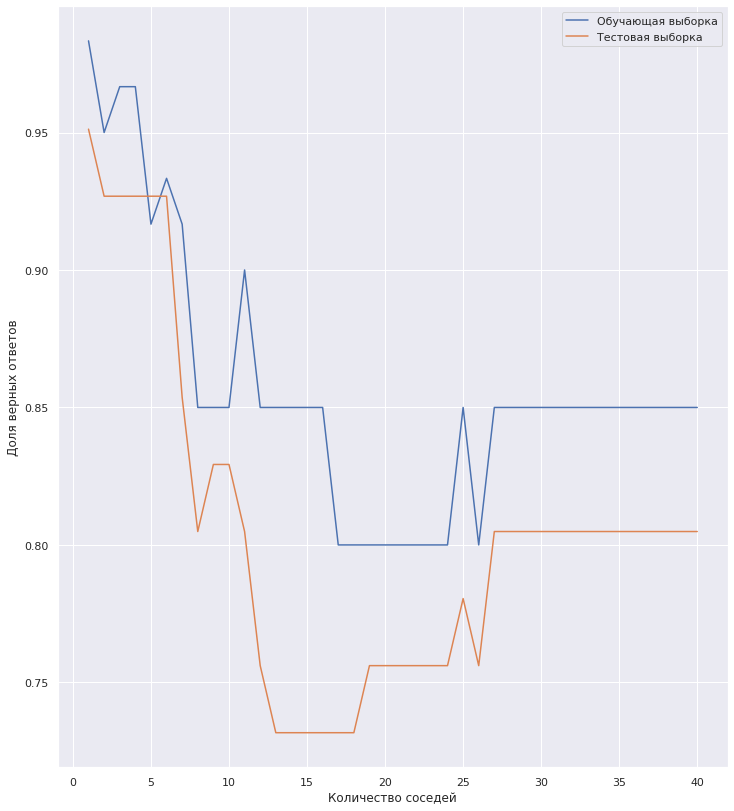

In [ ]:
# Создадим пустой словарь. Будем добавлять в него значения наших "скоров". Ключами будет значение гиперпараметра,
# значениями - качество работы. Рассмотрим отдельно качество на тренировочной выборке и на тестовой.
train_scores = {}
test_scores = {}

# для n в диапазоне от 1 до 40 включительно
for n in range(1, 41):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, Y_train)
    # значение качества на текущей итерации:
    current_train_score = clf.score(X_train, Y_train)
    current_test_score = clf.score(X_test, Y_test)
    # запишем его в наши словари
    train_scores[n] = current_train_score
    test_scores[n] = current_test_score

# нарисуем графики

plt.plot(list(train_scores.keys()), list(train_scores.values()), label='Обучающая выборка')
plt.plot(list(test_scores.keys()), list(test_scores.values()), label='Тестовая выборка')
plt.xlabel('Количество соседей')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

# Поиск наилучшего классификатора

Посмотрим на распределения и возможные зависимости признаков.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


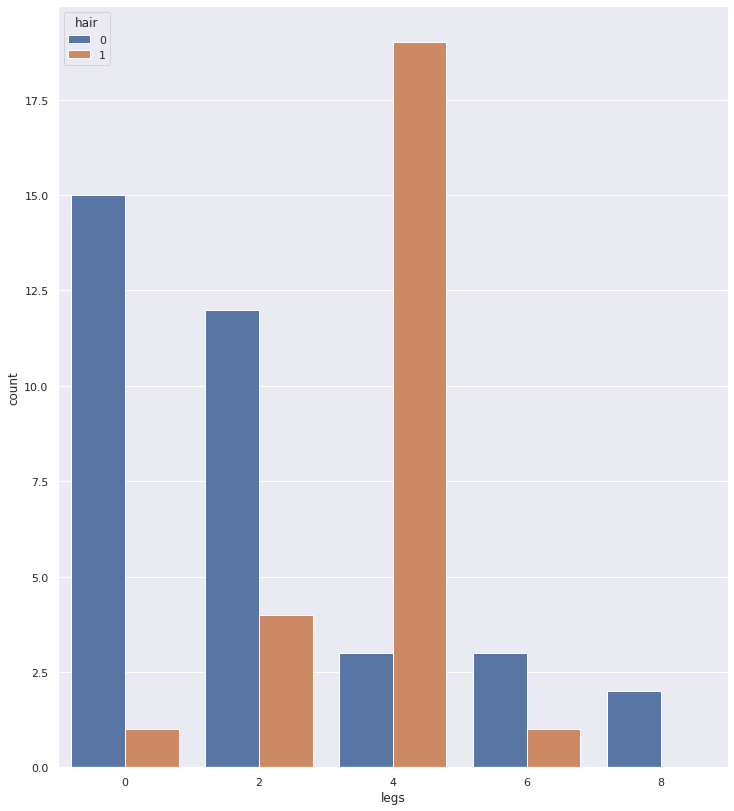

In [ ]:
sns.countplot(X_train['legs'], hue=Y_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


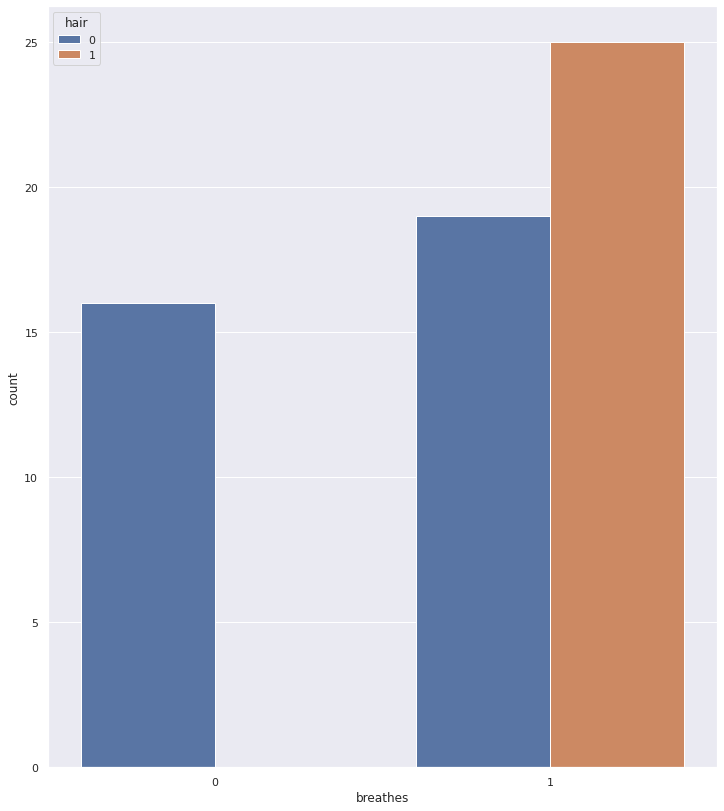

In [ ]:
sns.countplot(X_train['breathes'], hue=Y_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


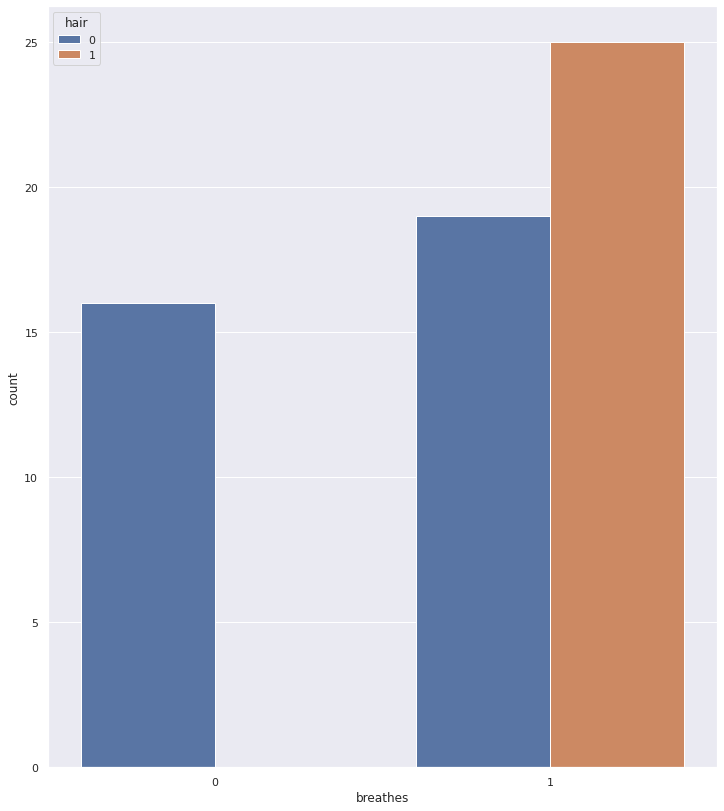

In [ ]:
sns.countplot(X_train['breathes'], hue=Y_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


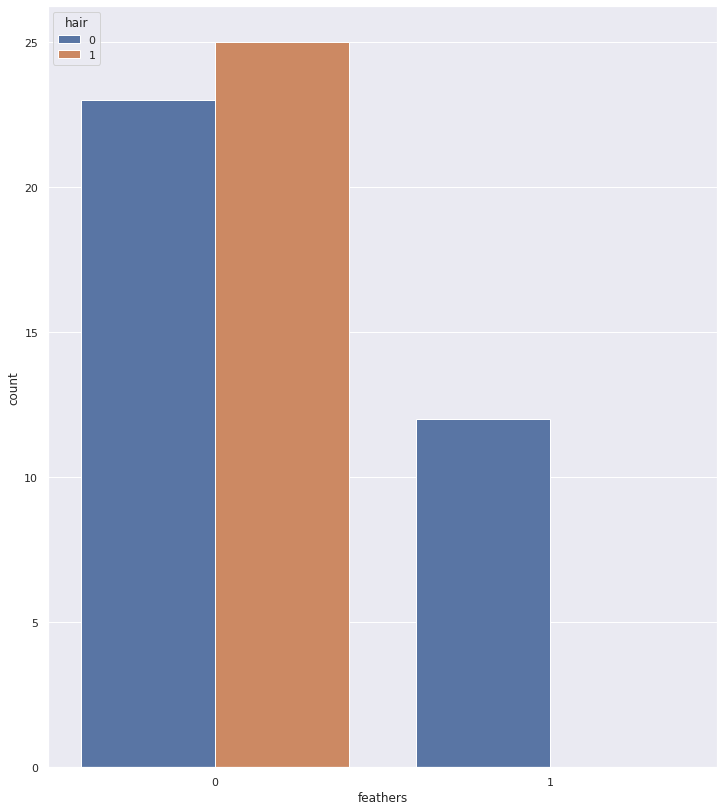

In [ ]:
sns.countplot(X_train['feathers'], hue=Y_train)

Видно что животных у которых есть шерсть почти столько же, сколько и животных у которых ее нет.

Распределение признаков между собой

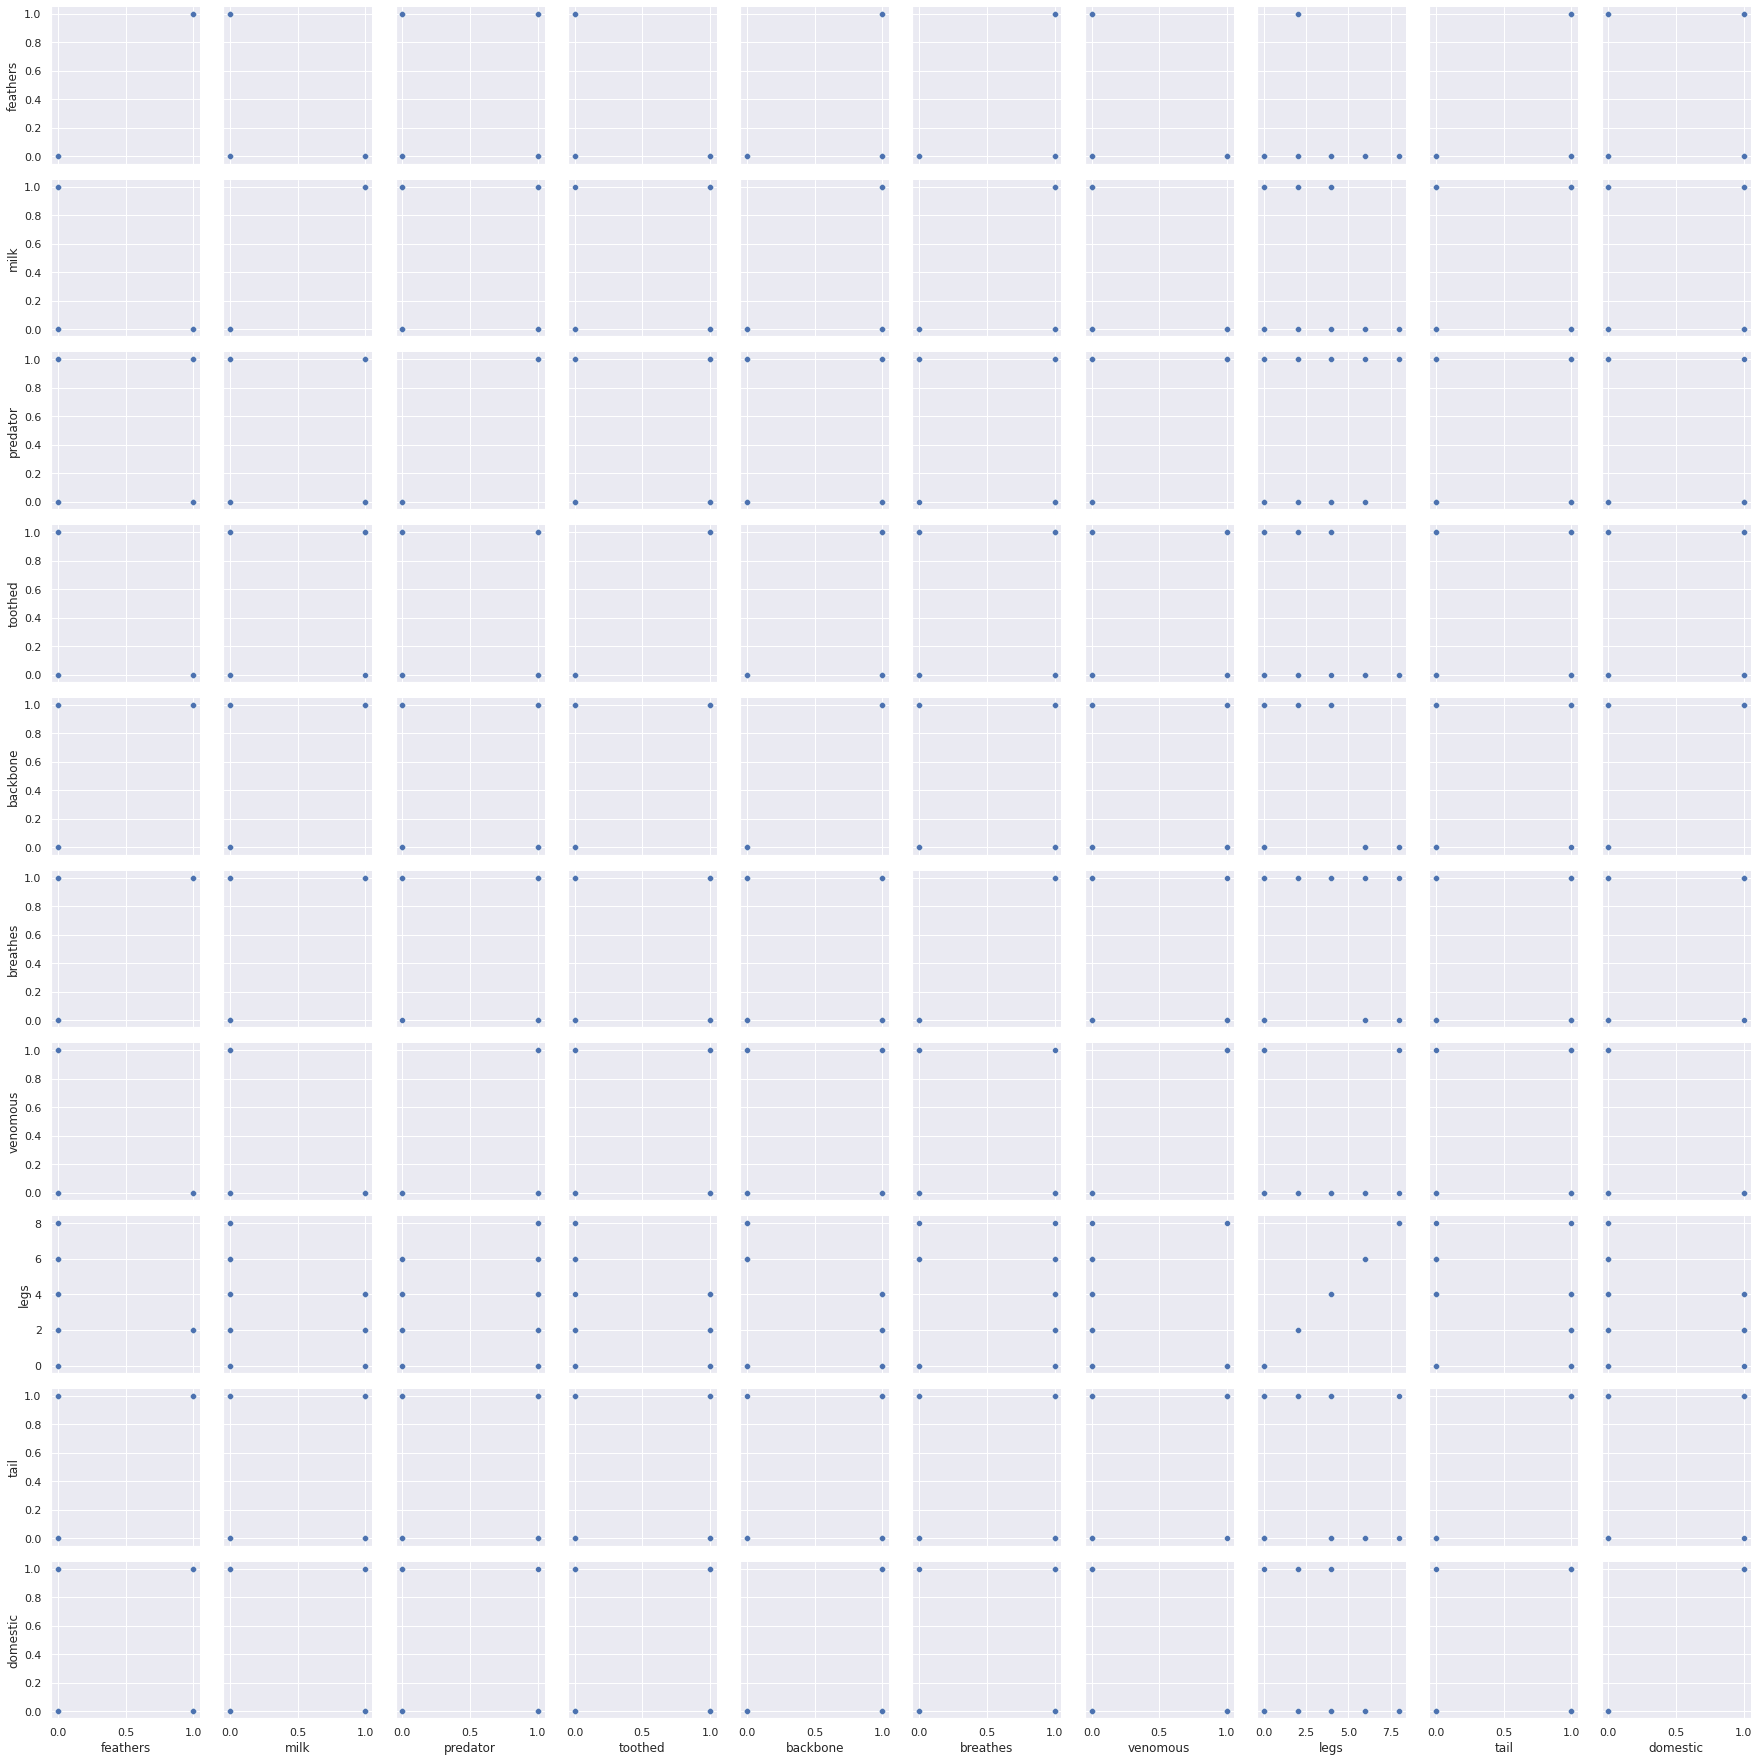

In [ ]:
data1=X_train
zoo = sns.PairGrid(data1)
zoo.map(sns.scatterplot)

Из данных графиков видно, что признаки по которым можно судить о наличии шерсти являются 'feathers','breathes','legs'.

Выбросы

Выбросы не наблюдались в предыдущей лабораторной

Проверка на анамольные значения (ищем выбросы, которые слишком сильно отличаются от остальной выборки). График называется boxplot. Прямоугольником обозначены 50 % всех значений. Черта посередине - это медиана. Медиана - это значение больше которого или меньше которого ровно 50% всех чисел  (если отсортировать весь набор данных по убыванию или возрастанию) (она выделена чертой). Также называется 0.5-квантилем в математической статистике.
Крайние точки - это крайние значения, число которых незначительно.

Ниже представлен график. Представляет плотность распредления величины.

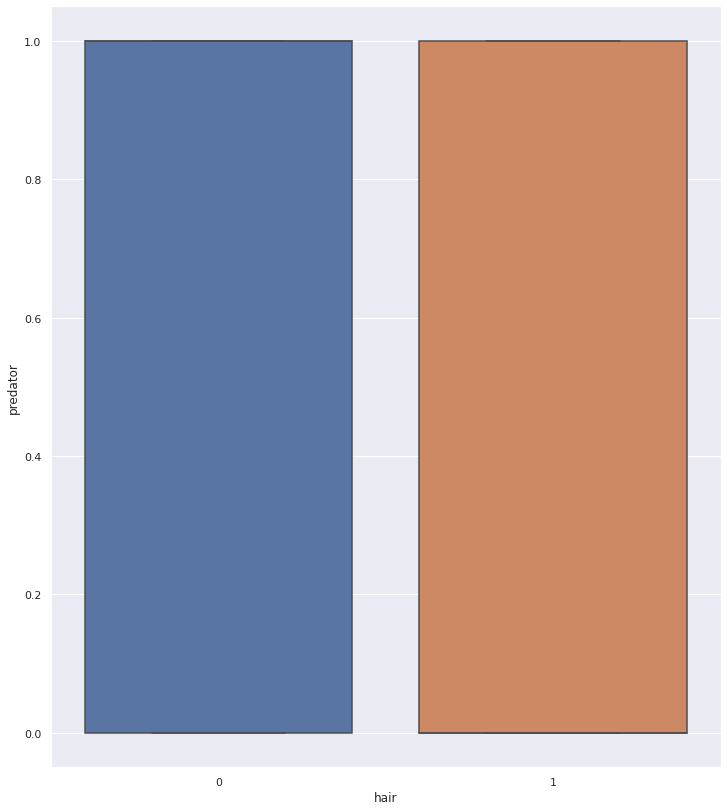

In [ ]:
predator = pd.read_csv('zoo.csv', sep=',')['predator']
sns.boxplot(x=y, y=predator)

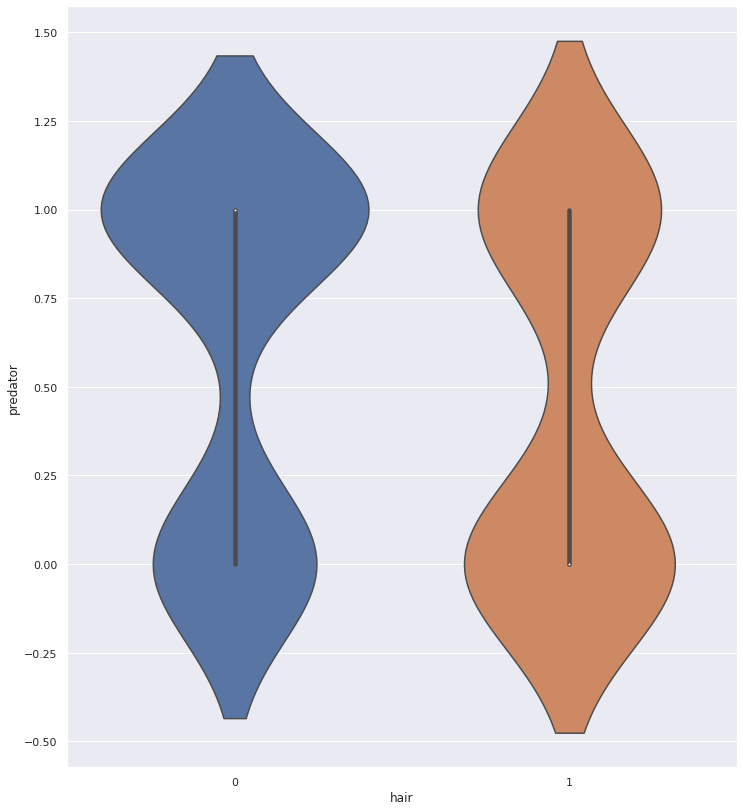

In [ ]:
sns.violinplot(x=y, y=predator) #хищник

# Нормализация признаков

Т.к. у нас все признаки в таблице бинарные кроме признака ног, то будет рассматривать графики ног и шерсти.

Блок кода ниже помогает определить, нужна ли нормализация (с помощью графиков). Конечная цель - внести нелинейность.

Качество алгоритма до нормализации: 0.926829268292683
Качество алгоритма после нормализации: 0.9024390243902439


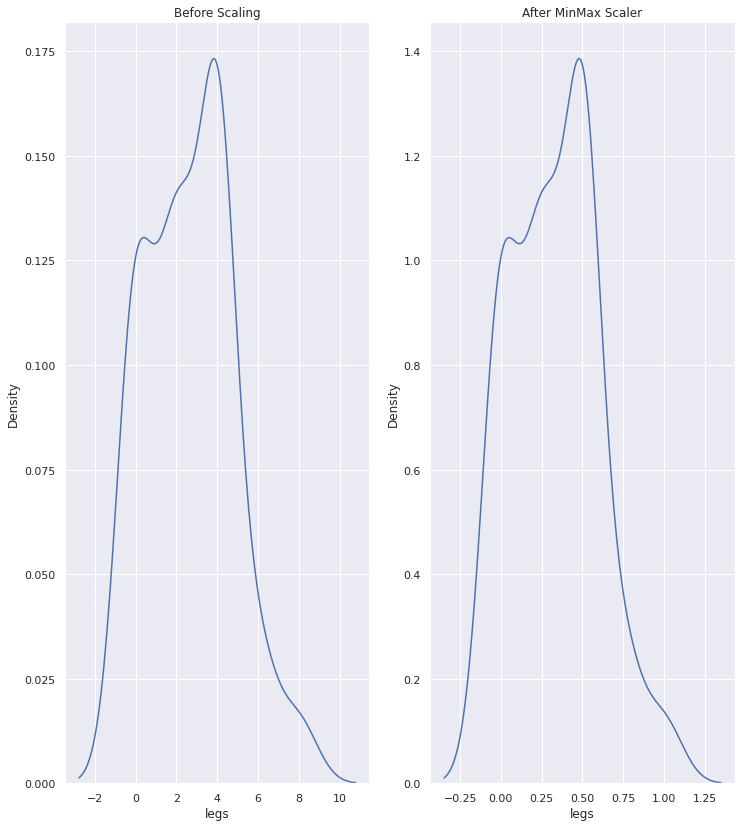

    feathers  milk  predator  toothed  ...  venomous  legs  tail  domestic
13         0     0         1        0  ...         0     0     0         0
49         0     1         1        1  ...         0     4     1         0
54         0     1         1        1  ...         0     4     1         0
53         0     0         1        0  ...         0     8     0         0
41         1     0         1        0  ...         0     2     1         0
91         0     0         1        1  ...         0     4     1         0
96         0     1         0        1  ...         0     2     1         0
4          0     1         1        1  ...         0     4     1         0
66         0     1         1        1  ...         0     0     1         0
86         0     0         1        1  ...         1     0     1         0
7          0     0         0        1  ...         0     0     1         1
92         0     0         1        1  ...         0     0     1         0
93         0     1       

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

print("Качество алгоритма до нормализации:",
      KNeighborsClassifier(n_neighbors=5).fit(X_train, Y_train).score(X_test, Y_test))

scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train, ), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

print("Качество алгоритма после нормализации:",
      KNeighborsClassifier(n_neighbors=5).fit(X_train_scaled, Y_train).score(X_test_scaled, Y_test))

# графики
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['legs'], ax=ax1)
ax2.set_title('After MinMax Scaler')
sns.kdeplot(X_train_scaled['legs'], ax=ax2)
plt.show()
print(X_train)
print(X_train_scaled)

# Подбор алгоритма

Не всегда можно сразу понять по визуализации данных, какой алгоритм может хорошо сработать. Рассмотрим качество на нескольких моделях:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB

for clf in [DecisionTreeClassifier(), SGDClassifier(), GaussianNB(), KNeighborsClassifier(n_neighbors=5)]:
    print(clf.__class__.__name__, clf.fit(X_train_scaled, Y_train).score(X_test_scaled, Y_test))

DecisionTreeClassifier 0.926829268292683
SGDClassifier 0.9024390243902439
GaussianNB 0.7560975609756098
KNeighborsClassifier 0.9024390243902439


В цикле обучим каждую из моделей на основе данных методов и посмотрим результаты. clf - счетчик. Мы попеременно каждый раз, беря новую модель, обучаем ее на уже нормализованных данных и считаем оценку.

Как видим из результатов, метод ближайших соседей оказался наиболее точным по сравнению с остальными.

-Стохастический градиентный спуск - SGDClassifier

-Метод опорных векторов (Support Vector Machines — SVM) — это набор контролируемых методов обучения, используемых для классификации , регрессии и обнаружения выбросов

-Наивные методы Байеса — это набор алгоритмов контролируемого обучения, основанных на применении теоремы Байеса с «наивным» предположением об условной независимости между каждой парой характеристик при заданном значении переменной класса

Удалим коррелирующий с целевой переменной признак 

In [ ]:
X_train_scaled=X_train_scaled.drop(['feathers'], axis='columns')
X_test_scaled=X_test_scaled.drop(['feathers'], axis='columns')

In [ ]:
for clf in [DecisionTreeClassifier(), SGDClassifier(), GaussianNB(), KNeighborsClassifier(n_neighbors=5)]:
    print(clf.__class__.__name__, clf.fit(X_train_scaled, Y_train).score(X_test_scaled, Y_test))

DecisionTreeClassifier 0.926829268292683
SGDClassifier 0.9024390243902439
GaussianNB 0.6341463414634146
KNeighborsClassifier 0.9024390243902439


# Стратификация

Важно увидеть следующее: если строк (объектов) в наборе данных относительно некоторого класса (целевого в данном случае) разное количество. Их соотношение не равно 1.

Количество животных с шерстью и без

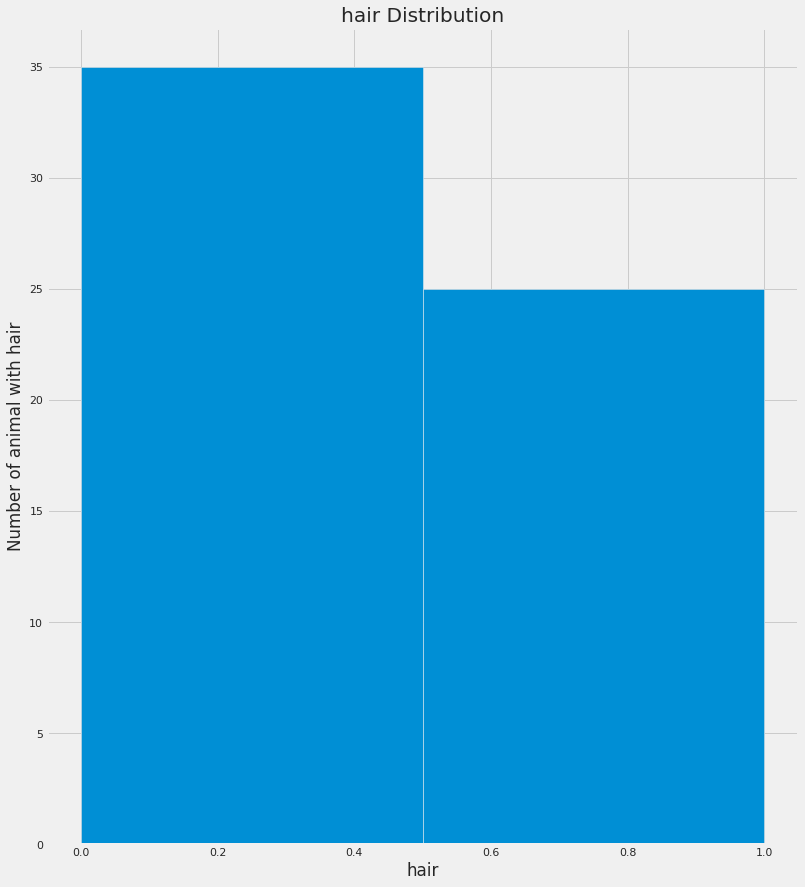

In [ ]:
plt.style.use('fivethirtyeight')
plt.hist(Y_train, bins=2);
plt.xlabel('hair'); plt.ylabel('Number of animal with hair');
plt.title('hair Distribution');

Объектов строк в нашем наборе данных относительно целевого разное количество. Их соотношение не равно 1.

In [ ]:
from sklearn.metrics import accuracy_score
#Создадим переменную, в которую будут просто записаны 1. Функция ниже возвращает вектор из единиц.
a = np.ones(Y_test.shape[0])
#Передадим функции, считающей точность
accuracy_score(Y_test, a)

0.43902439024390244

Точность 0.43. Это не классификатор, с точки зрения метрики результат неплох, но с точки зрения выдачи результата не имеет ценности.

Увеличим количество примеров из нецелевого класса. В набор данных запишем те же объекты еще несколько раз.

In [ ]:
X_train_scaled.reset_index(inplace=True, drop=True)
Y_train.reset_index(drop=True, inplace=True)

In [ ]:
feathers = X_train_scaled[Y_train == 0]
X_train_strat = pd.concat([X_train_scaled, feathers, feathers], ignore_index=True)
Y_train_strat = pd.concat([Y_train, pd.Series(np.ones(X_train_strat.shape[0]-X_train_scaled.shape[0]))],
                          ignore_index=True)

In [ ]:
for clf in [DecisionTreeClassifier(), SGDClassifier(), GaussianNB(), KNeighborsClassifier(n_neighbors=10)]:
    print(clf.__class__.__name__, clf.fit(X_train_strat, Y_train_strat).score(X_test_scaled, Y_test))

DecisionTreeClassifier 0.43902439024390244
SGDClassifier 0.4634146341463415
GaussianNB 0.7560975609756098
KNeighborsClassifier 0.6097560975609756


Как можно заметить, после увеличения количества примеров из нецелевого класса, наилучшим методом обучения является Гауссовский метод.

# Метрики качества

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, roc_auc_score, f1_score, fbeta_score, auc

print('Accuracy:', accuracy_score(Y_test, a))
print('Precision:', precision_score(Y_test, a))
print('Recall:', recall_score(Y_test, a))
print('ROC AUC:', roc_auc_score(Y_test, a))
pr, rec, _ = precision_recall_curve(Y_test, a)
print('PRC AUC:', auc(rec, pr))
print('F1:', f1_score(Y_test, a))


Accuracy: 0.43902439024390244
Precision: 0.43902439024390244
Recall: 1.0
ROC AUC: 0.5
PRC AUC: 0.7195121951219512
F1: 0.6101694915254238


Метрика Accuracy не подходит в качестве метрика качества для нашего классификатора,т.к. количество объектов разных классов у нас отличается(животных с шерстью почти в два раза больше чем без). 
Метрика Precission и Recall сильно зависят от того, какая доля целевого класса есть в выборке,следовательно, нам не подходят.
Метрика PRC AUC не очень, т.к. использует метрики Precission и Recall.
Метрика ROC AUC один из науличших вариантов, т.к. позволяет определить насколько осознанное предсказание дает наш классификатор(насколько правильно он распределяет объекты по классам).



